<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/11_%EA%B7%9C%EC%A0%9C_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

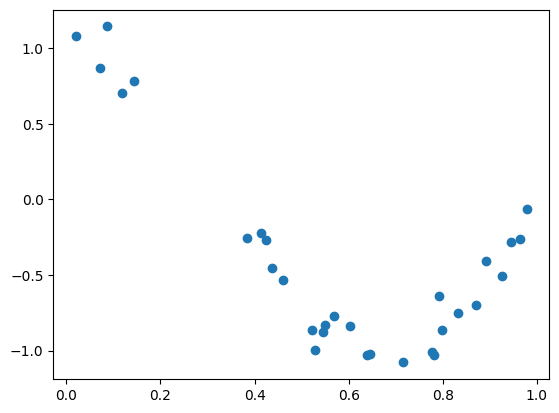

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터 입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X, y)
plt.show()


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


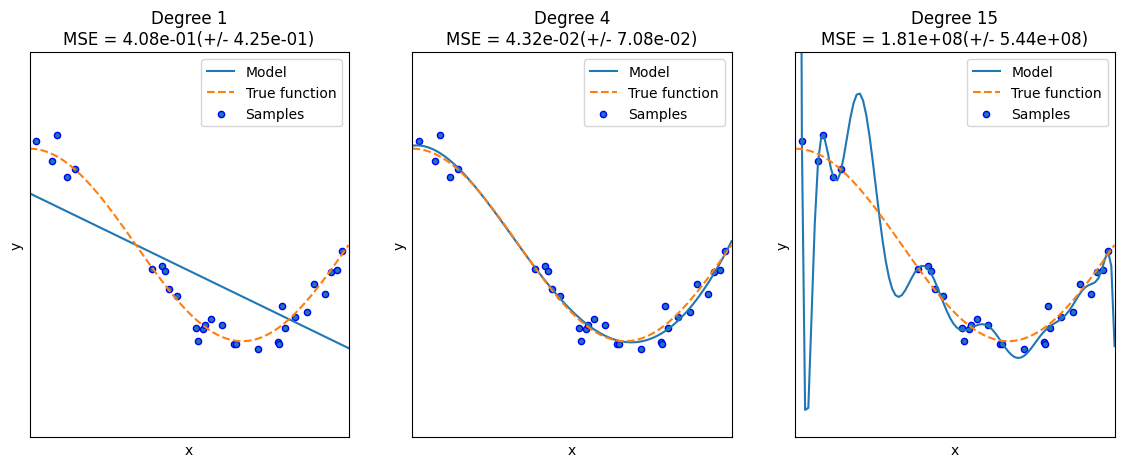

In [2]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

In [3]:
# 과대적합 상황을 만들기 - 15차수 데이터
polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])
pipeline.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linear_regression', LinearRegression())])

In [4]:
def print_metric(pipeline, X, y, step_name):
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps[step_name].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

print_metric(pipeline, X, y, step_name="linear_regression")


Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


# 규제 선형회귀
- 가중치 규제를 수행 할 때 0에 가까운 값으로 수행한다.
- 가중치가 0이 되지는 않기 때문에 모든 특성(Feature)를 사용한다.
- alpha가 커지면, 회귀계수(가중치)는 작아짐
- alpha가 작아지면, 회귀계수(가중치)가 커져도 상관 없음

In [23]:
from sklearn.linear_model import Ridge

polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
ridge = Ridge(alpha=0.01)



pipeline = Pipeline([("polynomial_features", polynomial_features),
                      ("ridge", ridge)])
pipeline.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('ridge', Ridge(alpha=0.01))])

In [24]:
print_metric(pipeline, X, y, step_name = "ridge")


Degree 15 회귀 계수는 [-3.43 -1.29  0.39  1.09  1.2   1.01  0.71  0.41  0.15 -0.05 -0.2  -0.29
 -0.34 -0.35 -0.33] 입니다.
Degree 15 MSE 는 0.02 입니다.


Text(0.5, 1.0, 'Degree 15\nMSE = 1.81e+08(+/- 5.44e+08)')

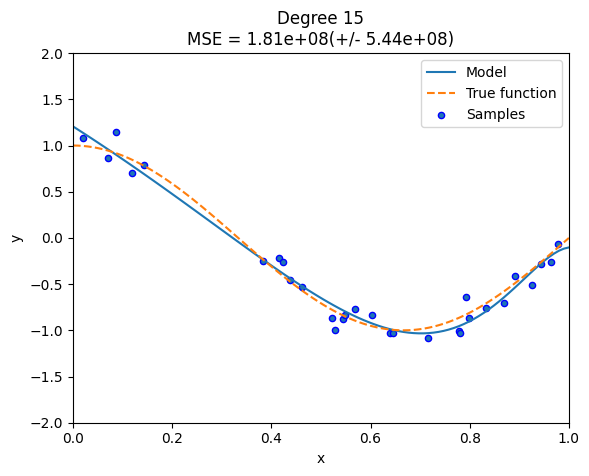

In [26]:
X_test = np.linspace(0, 1, 100)
# 예측값 곡선
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
# 실제 값 곡선
plt.plot(X_test, true_fun(X_test), '--', label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

# 보스턴 주택 가격 예측하기

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # 사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Ridge를 활용한 규제 선형회귀 확인하기

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = boston_df.drop("PRICE", axis=1)
y = boston_df["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=42
)

In [31]:
lr_ridge = Ridge(alpha=0.01)
lr_ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [32]:
ridge_pred = lr_ridge.predict(X_test)

mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
r2 = lr_ridge.score(X_test, y_test)

print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R2 : {:.3f}".format(r2))

MSE : 24.292
RMSE : 4.929
R2 : 0.669


## degree = 3 다항식 생성

In [33]:
from sklearn.preprocessing import PolynomialFeatures

boston_poly = PolynomialFeatures(degree=3, include_bias=False)

X_poly_train = boston_poly.fit_transform(X_train)
X_poly_test = boston_poly.fit_transform(X_test)

In [34]:
# transformer를 사용했으면, 반드시 shape을 확인해야 한다.
# 훈련 데이터 세트와 테스트 데이터 세트가 같은 열(reature)의 개수를 갖는지를 봐야 한다.
# 열의 개수만 확인. 행의 개수는 달라도 상관 없음.
# ((404, 559), (102, 559))
X_poly_train.shape, X_poly_test.shape

((404, 559), (102, 559))

# Ridge VS LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_poly_train, y_train)
# LinearRegression에 3차수 데이터를 넣었을 때 매우 심한 과대 적합이라 alpha를 좀 큰 값으로 설정
ridge = Ridge(alpha=10).fit(X_poly_train, y_train)

In [37]:
# 훈련 데이터에 대한 예측
from sklearn.metrics import r2_score

lr_train_pred = lr.predict(X_poly_train)
ridge_train_pred = ridge.predict(X_poly_train)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_train_r2 = r2_score(y_train, lr_train_pred)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_train_rmse = np.sqrt(ridge_train_mse)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)

print("LinearRegression MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(lr_train_mse, lr_train_rmse, lr_train_r2))
print("Ridge MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(ridge_train_mse, ridge_train_rmse, ridge_train_r2))

LinearRegression MSE : 0.000 / RMSE : 0.000 / R2 : 1.000
Ridge MSE : 12.477 / RMSE : 3.532 / R2 : 0.856


In [38]:
# 회귀 계수 확인
lr.coef_[:5], ridge.coef_[:5]

(array([-7.51246042e-01, -3.80910253e+00, -1.06667739e+00, -2.14105099e-03,
        -4.78166569e-02]),
 array([ 4.23878684e-05,  5.59801753e-05, -5.13986377e-06, -3.55146115e-05,
        -2.63078790e-06]))

In [39]:
# 테스트 세트 확인
lr_test_pred = lr.predict(X_poly_test)
ridge_test_pred = ridge.predict(X_poly_test)

lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_test_r2 = r2_score(y_test, lr_test_pred)

ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print("LinearRegression MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(lr_test_mse, lr_test_rmse, lr_test_r2))
print("Ridge MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(ridge_test_mse, ridge_test_rmse, ridge_test_r2))

LinearRegression MSE : 129848.045 / RMSE : 360.344 / R2 : -1769.644
Ridge MSE : 133.464 / RMSE : 11.553 / R2 : -0.820


- alpha가 커질수록 -> 회귀계수가 작아짐
- alpha가 작아질수록 -> 회귀계수가 커짐

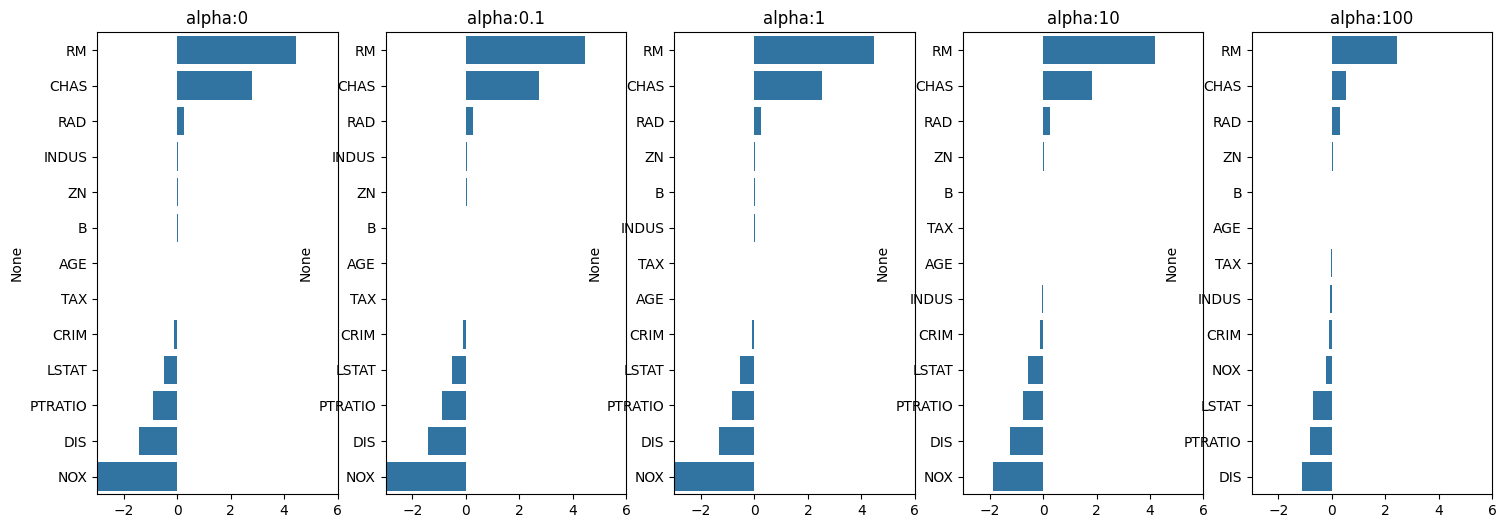

In [40]:
alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# Lasso를 활용한 규제 선형회귀 확인하기

In [41]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso(alpha=10).fit(X_train, y_train)

## 성능 체크

In [42]:
lasso_pred = lr_lasso.predict(X_test)

mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse, rmse, r2))

MSE : 34.686 / RMSE : 5.889 / R2 : 0.527


In [44]:
lr_lasso.coef_

array([-0.        ,  0.00632092, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.0090727 ,
       -0.        ,  0.00989229, -0.60414765])

3차식인 X_poly_test를 사용

In [45]:
lr_lasso = Lasso(alpha=10).fit(X_poly_train, y_train)

lasso_pred = lr_lasso.predict(X_poly_test)

mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)

print("MSE : {:.3f} / RMSE : {:.3f} / R2 : {:.3f}".format(mse, rmse, r2))

MSE : 13.241 / RMSE : 3.639 / R2 : 0.819


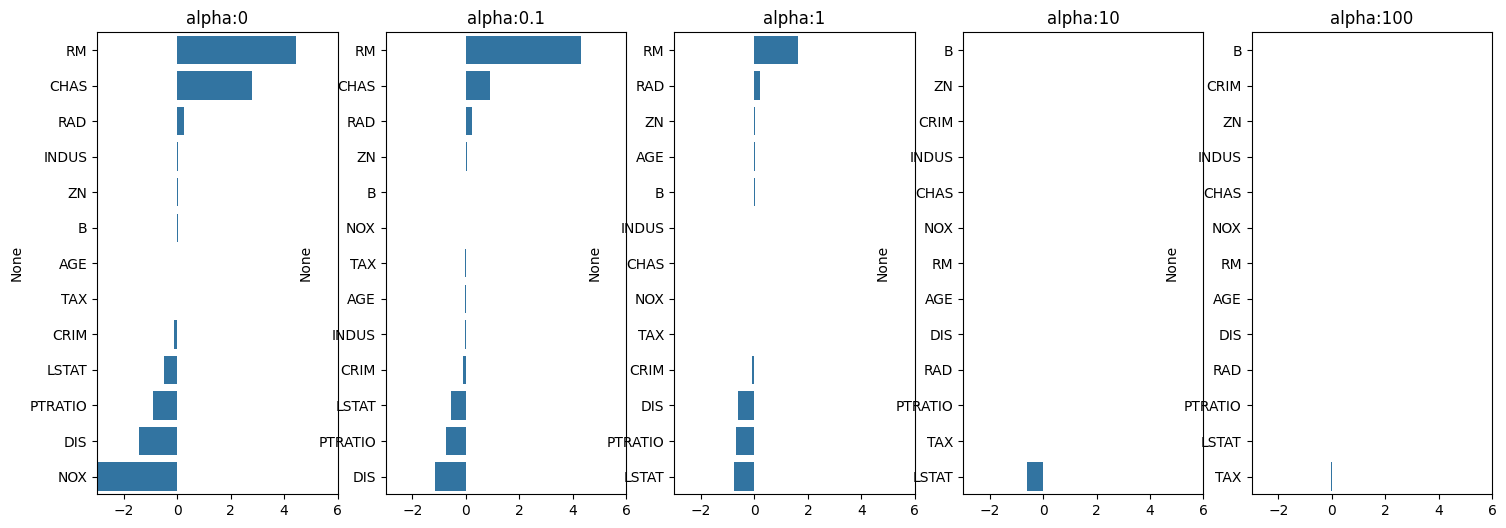

In [46]:
alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=lasso.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()